In [1]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

import seaborn
import helper
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 

# TODO 
# Power specturm analysis : drop bad channels, load data, create epochs and wavelets analysis


Using matplotlib backend: Qt5Agg


In [2]:
proc = 'BP'
subid = 'JuRo'
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
fname = helper.CIFAR_filename(subid=subid,task='sleep',proc=proc)
fpath = cfsubdir.joinpath(fname)
fpath = os.fspath(fpath)
raw = mne.io.read_raw_eeglab(fpath)

Reading /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_BP_montage.fdt


<ipython-input-2-c151879a88de>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath)


In [3]:
# Bad chan info
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6','RPs1-RPs2']
raw.info['bads'] = bad_chan

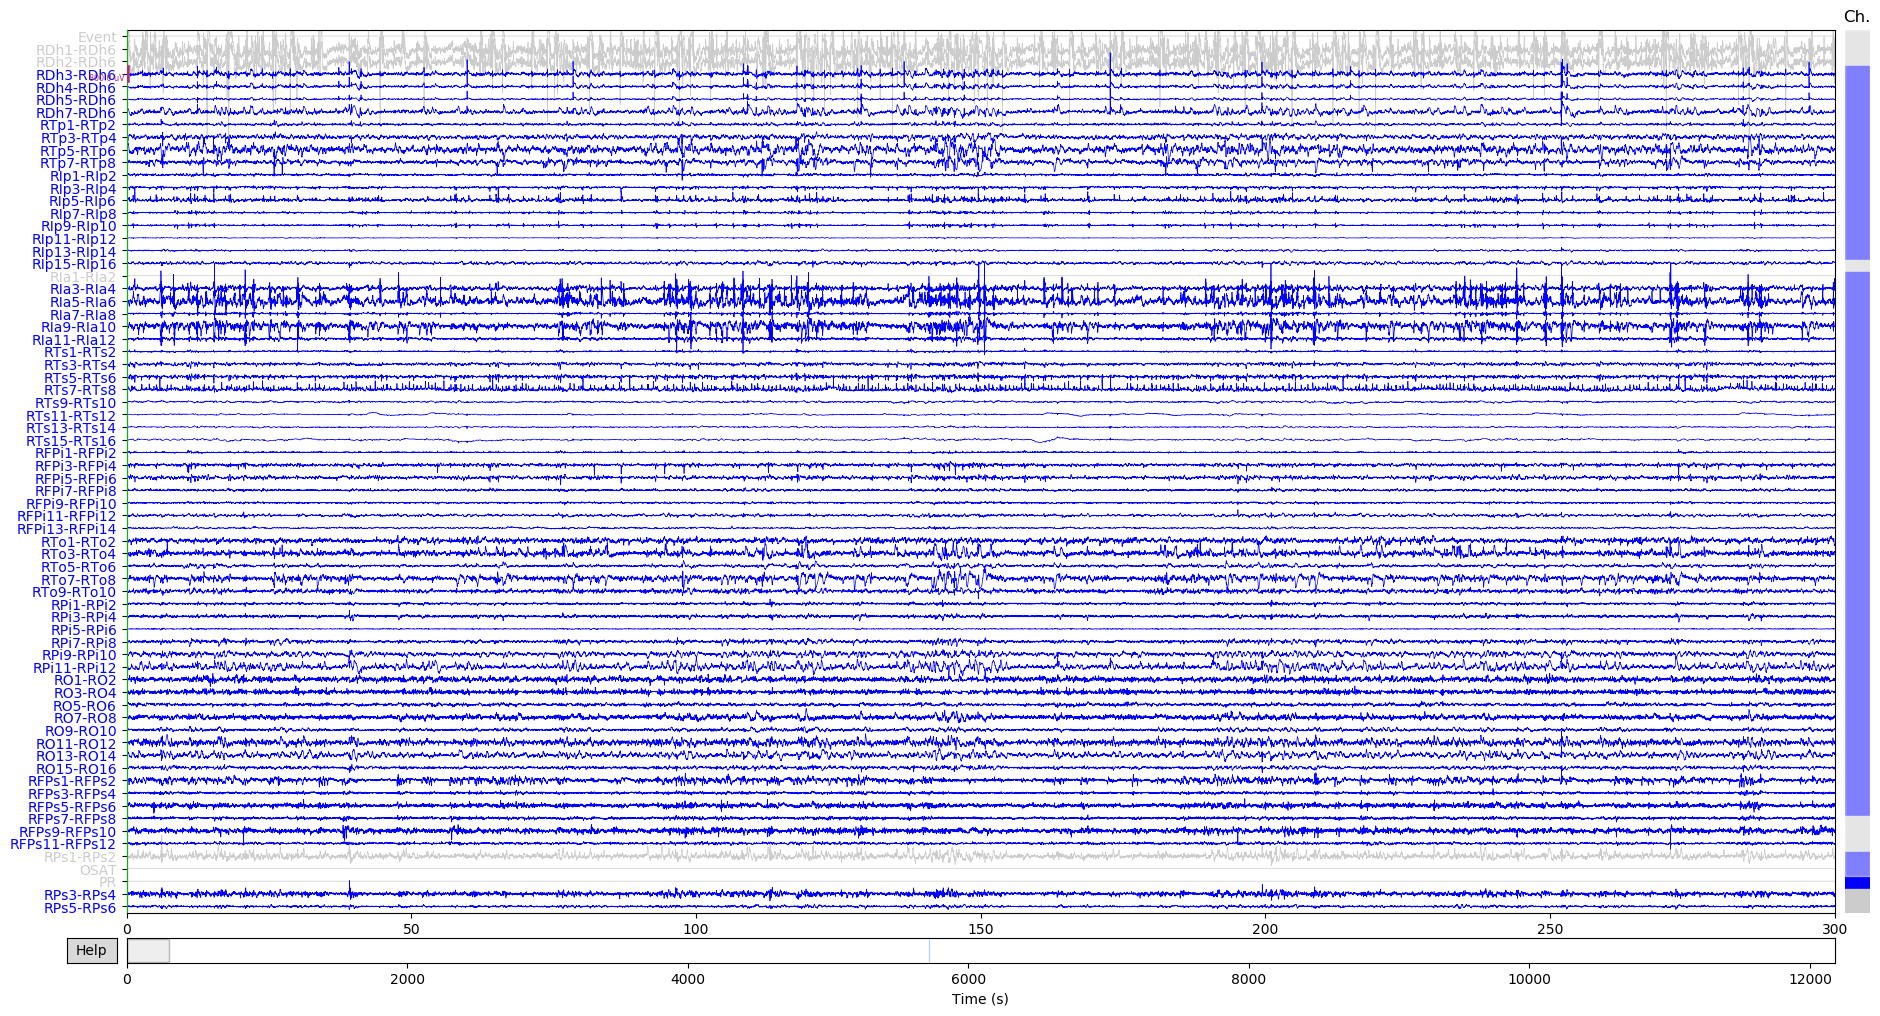

Traceback (most recent call last):
  File "/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/mne/viz/utils.py", line 1100, in _mouse_click
    xdata = event.xdata - params['first_time']
TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/mne/viz/utils.py", line 1100, in _mouse_click
    xdata = event.xdata - params['first_time']
TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'


In [9]:
raw.plot(duration=300, n_channels=70, scalings=4e-4, color='b', butterfly=False)

In [14]:
##Save annotation
# fsave = helper.CIFAR_filename(subid=subid, task='sleep', suffix='_annotated_raw.fif')
# fpath = cfsubdir.joinpath(fsave)
# fpath = os.fspath(fpath)
# raw.save(fpath, overwrite=True)

Overwriting existing file.
Writing /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_2_raw.fif
Closing /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_2_raw.fif [done]


In [4]:
fsave = helper.CIFAR_filename(subid=subid, task='sleep', suffix='_annotated_2_raw.fif')
fpath = cfsubdir.joinpath(fsave)
fpath = os.fspath(fpath)
raw_annot = mne.io.read_raw_fif(fpath)

Opening raw data file /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_2_raw.fif...
    Range : 0 ... 6088056 =      0.000 ... 12176.112 secs
Ready.


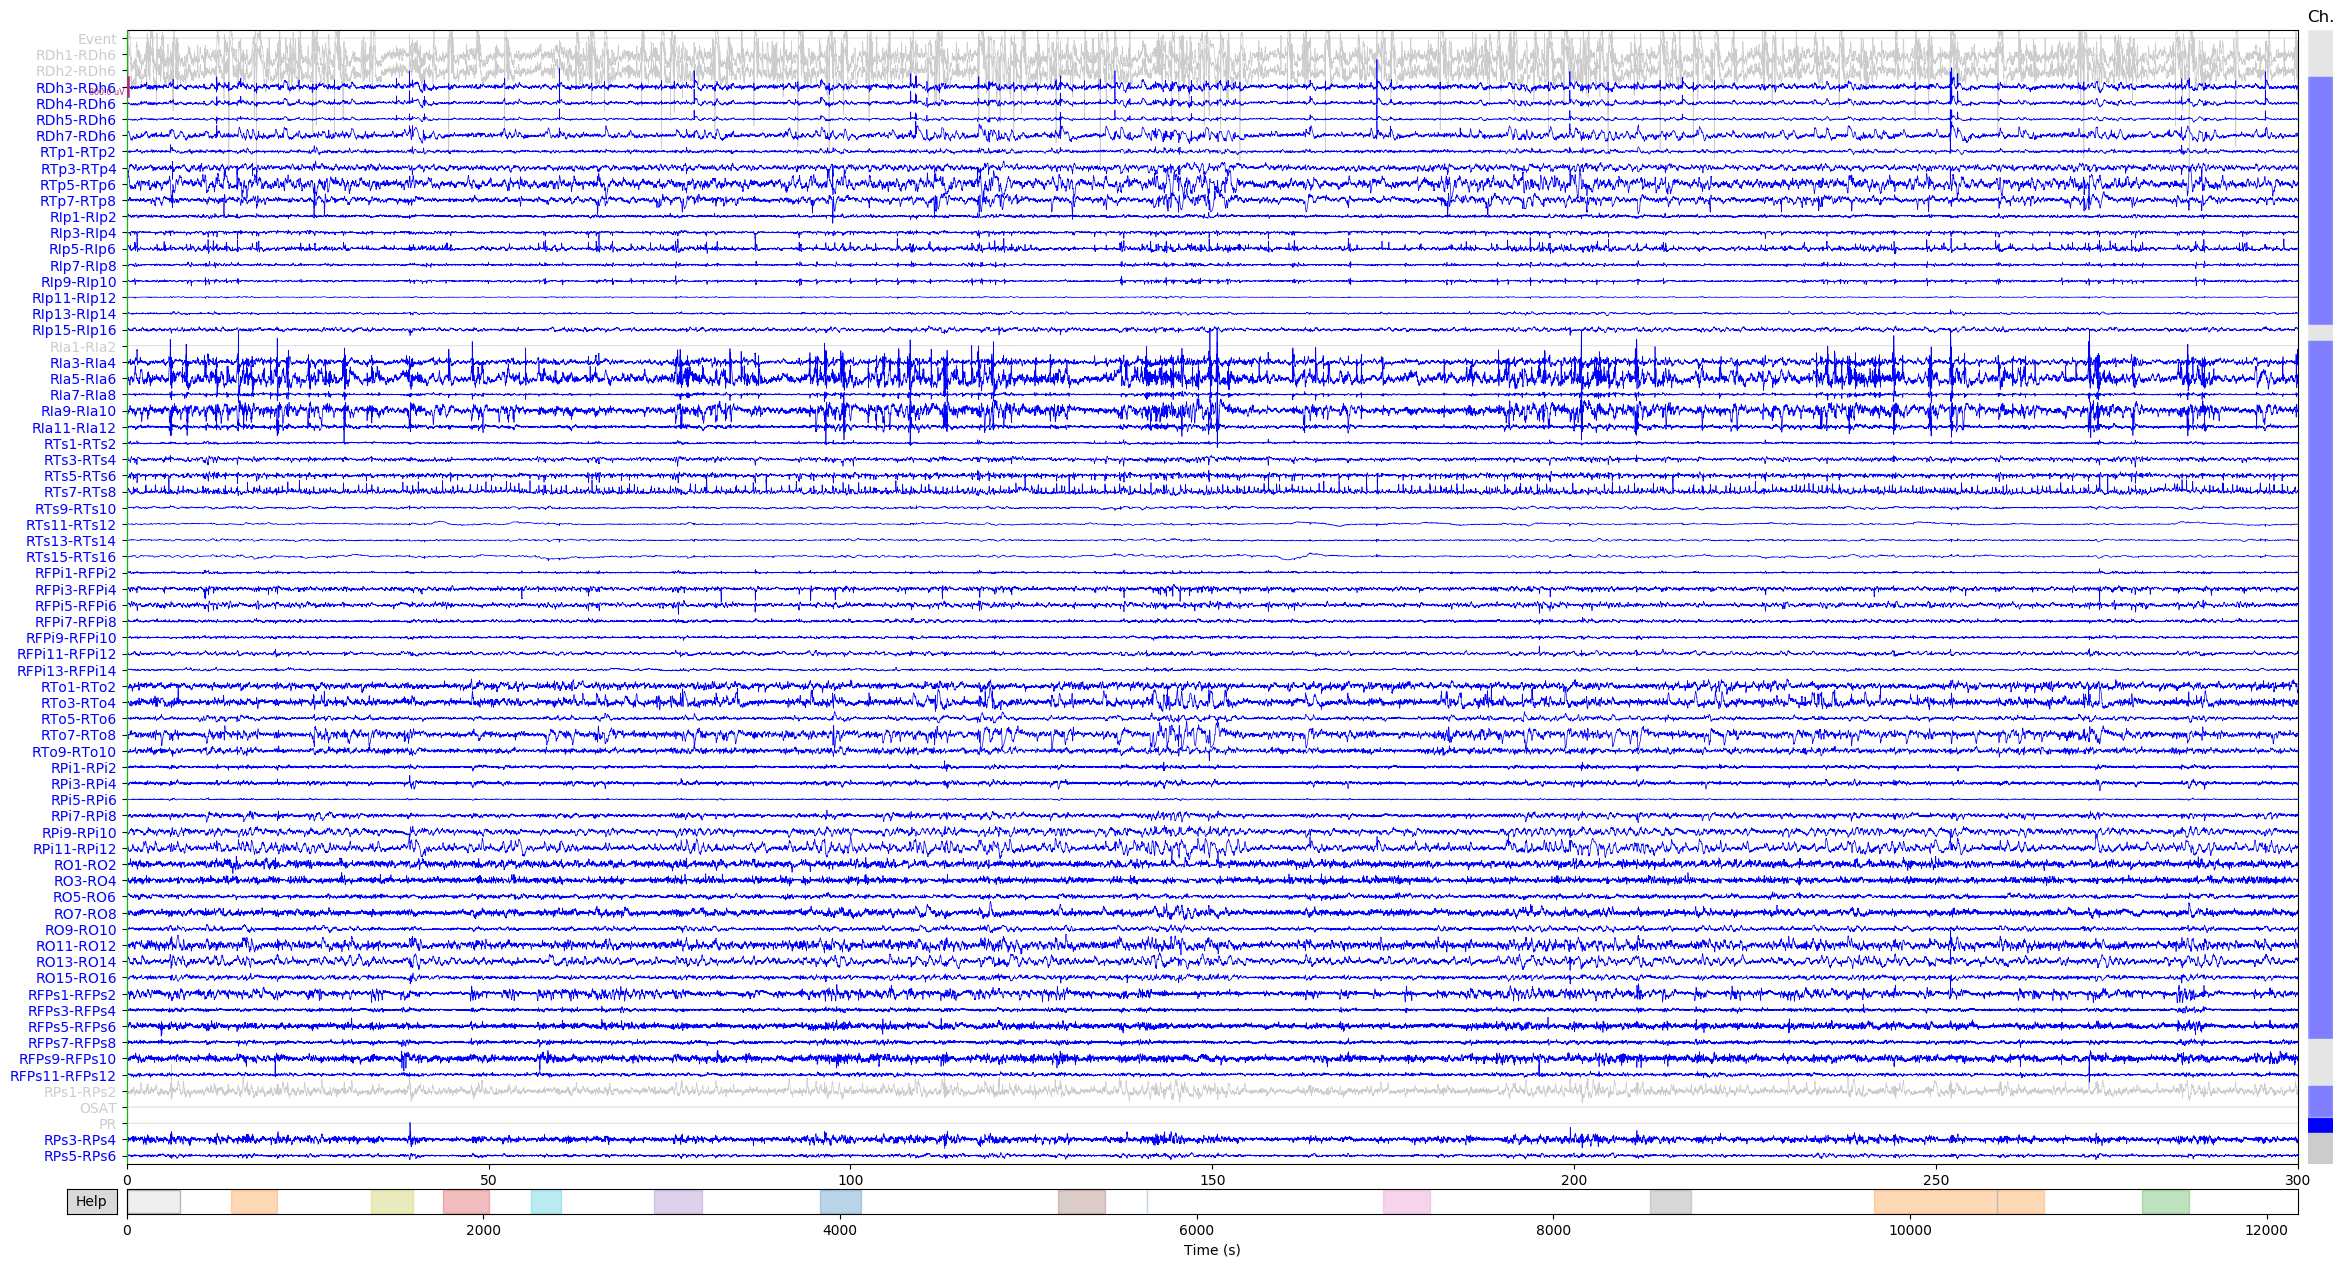

In [53]:
raw_annot.plot(duration=300, n_channels=70, scalings=4e-4, color='b', butterfly=False)

In [23]:
# rem_annot = mne.Annotations(onset=[10, 2360, 2840, 4100, 10660],
#                             duration=[200]*5,
#                             description=['stage 1', 'stage 2', 'stage 3', 'stage 2' ,'stage 1'])

In [24]:
# raw.set_annotations(rem_annot)
# (rem_events,
#  rem_event_dict) = mne.events_from_annotations(raw, chunk_duration=10)

Used Annotations descriptions: ['stage 1', 'stage 2', 'stage 3']


In [6]:
events, events_dict = mne.events_from_annotations(raw_annot, chunk_duration=20)

Used Annotations descriptions: ['boundary', 'stage 1', 'stage 1b', 'stage 2', 'stage 3', 'stage 4', 'stage 4b', 'stage 5', 'transition 1', 'transition 2', 'transition 3', 'transition 4']


In [123]:
events_dict

{'boundary': 1,
 'stage 1': 2,
 'stage 1b': 3,
 'stage 2': 4,
 'stage 3': 5,
 'stage 4': 6,
 'stage 4b': 7,
 'stage 5': 8,
 'transition 1': 9,
 'transition 2': 10,
 'transition 3': 11,
 'transition 4': 12}

In [30]:
# If want to chunck event differentely or just load event data
# event_pick = mne.pick_events(events, include=2)

In [22]:
epochs = mne.Epochs(raw, events, tmin=- 0.2, tmax=10, 
                    event_repeated='drop')

164 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [27]:
# epochs.plot(n_epochs=5, scalings=4e-4, butterfly=False)

In [39]:
# epochs['2'].plot_psd(fmin=1, fmax=100, xscale='log',average=False)

In [9]:
# Pick channels 
picks = ['RTo9-RTo10',  'RTo7-RTo8', 'RO1-RO2', 'RIp9-RIp10', 'RFp5-RFp6', 'RIa5-RIa6', 'RIa11-RIa12', 'RFPs9-RFPs10', 'RTp5-RTp6']

In [24]:
epoch_stage = epochs['8'].load_data()

Loading data for 11 events and 5101 original time points ...
0 bad epochs dropped


In [26]:
epoch_stage.pick_channels(ch_names=['RIa11-RIa12'])

<Epochs  |   11 events (all good), -0.2 - 10 sec, baseline [None, 0], ~499 kB, data loaded,
 '8': 11>

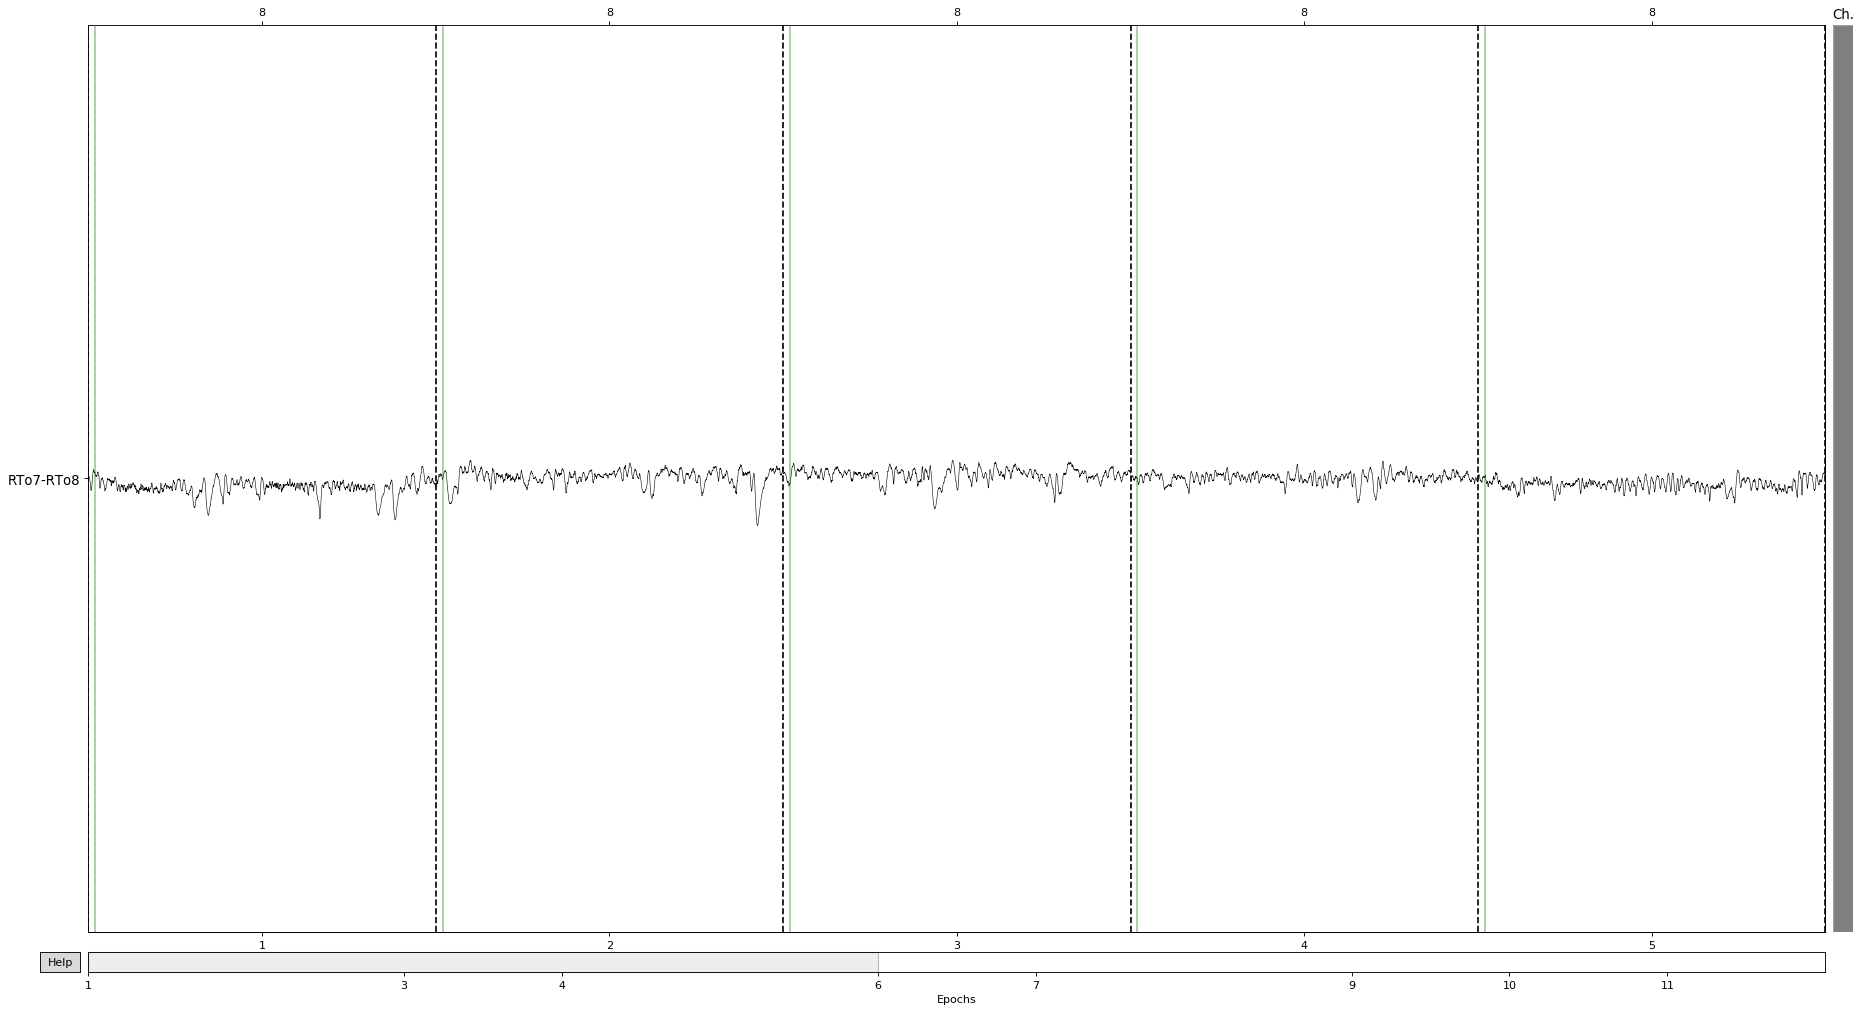

Dropped 0 epochs
Channels marked as bad: []


In [27]:
epoch_stage.plot(n_epochs=5, scalings=4e-4, butterfly=False)

In [105]:
#epoch_stage.plot_psd(fmin=1, fmax=100, xscale='log',average=False)

In [12]:
# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}
bands = ['Delta', 'Theta','Alpha','Beta', 'Gamma']
ticks = [1, 4, 8, 12,30]

In [101]:

for istage in range(2,9):
    epoch_stage =  epochs[f'{istage}'].load_data()
    epoch_chan = epoch_stage.pick_channels(ch_names=['RIa11-RIa12'])
    psds, freqs = psd_multitaper(epoch_chan, low_bias=True)
    psds = 10 * np.log10(psds)
    psds_mean = psds.mean(0).mean(0)
    plt.plot(freqs, psds_mean, label=f'{istage}')
    plt.xscale('log')
    plt.xlim(xmin=1, xmax=50)
    plt.legend()
    
plt.title(f'psd {subid} channel RTo7-RTo8 (V2) sleep stages, averaged over 12 epochs of 10 seconds')
plt.xlabel('Frequency (Hz, log scale)')
plt.ylabel('Power (dB)')
plt.xticks(ticks, bands)

Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 11 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows

([<matplotlib.axis.XTick at 0x7fb35fa27650>,
 <a list of 5 Text xticklabel objects>)

Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped


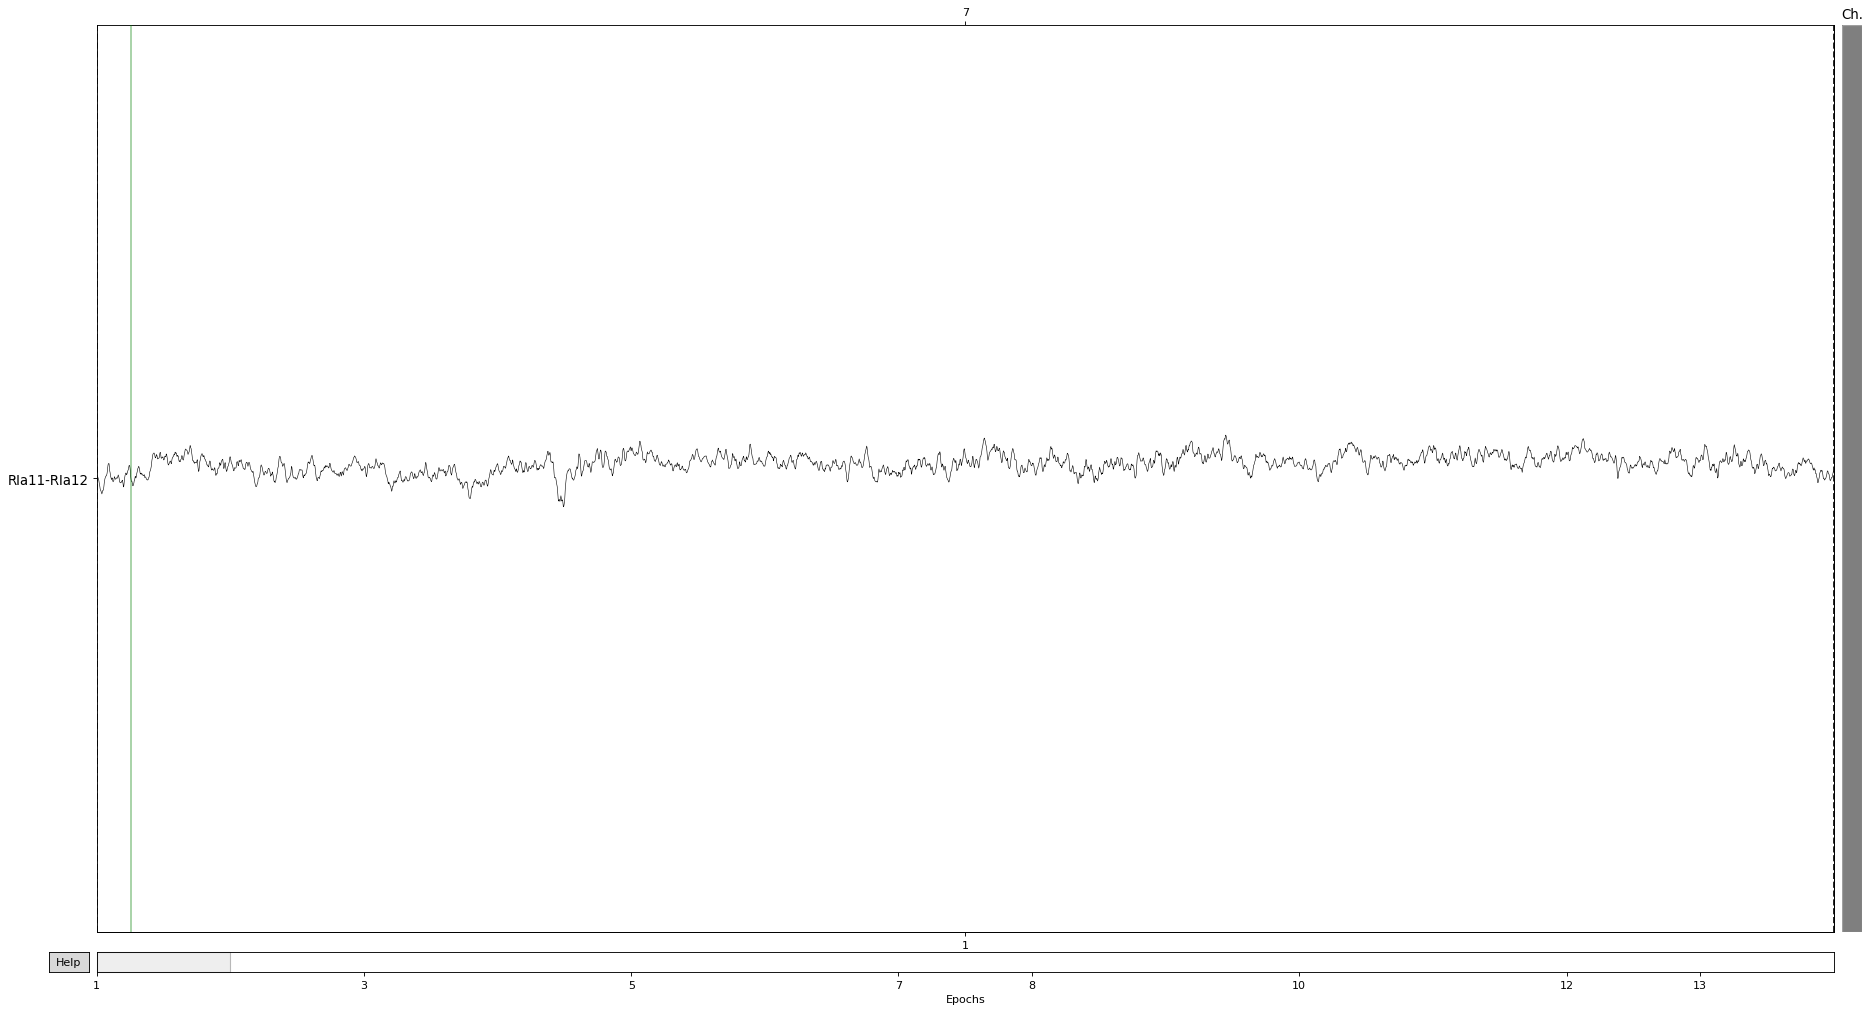

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']


In [104]:
# Plot in time 
epoch_stage =  epochs['7'].load_data()
epoch_stage.plot(picks='RIa11-RIa12' , n_epochs=1, scalings=8e-5)

Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 sec)



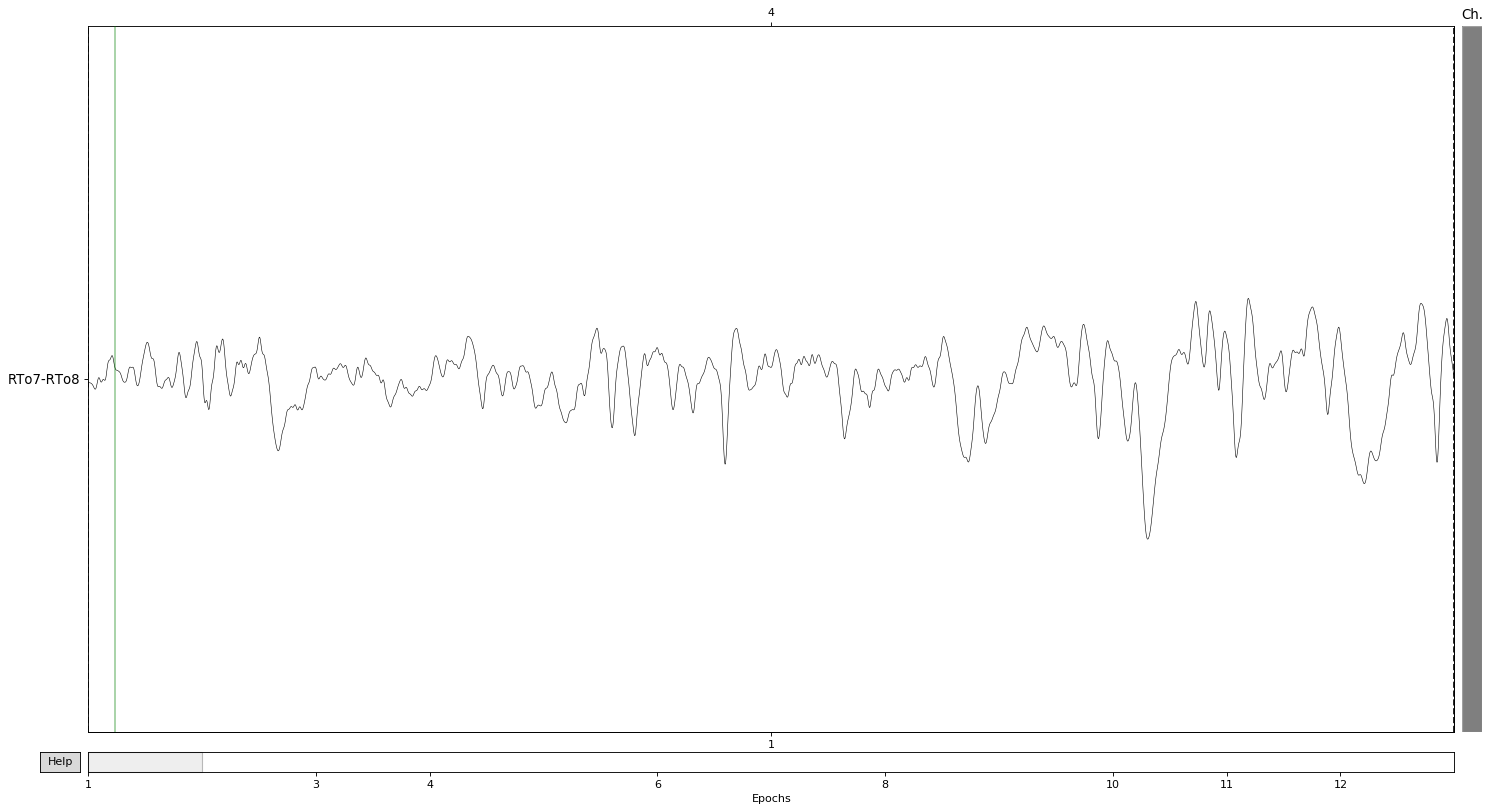

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']


In [90]:
epochs_filt = epochs['4'].load_data().copy().filter(l_freq=0.5, h_freq=30, picks='RTo7-RTo8',)
epochs_filt.plot(picks='RTo7-RTo8' , n_epochs=1, scalings=8e-5)

In [ ]:
# TODO Compare with specific time sections, maybe filter data in relevant frequency bands

Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1e+02 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 67 samples (0.134 sec)



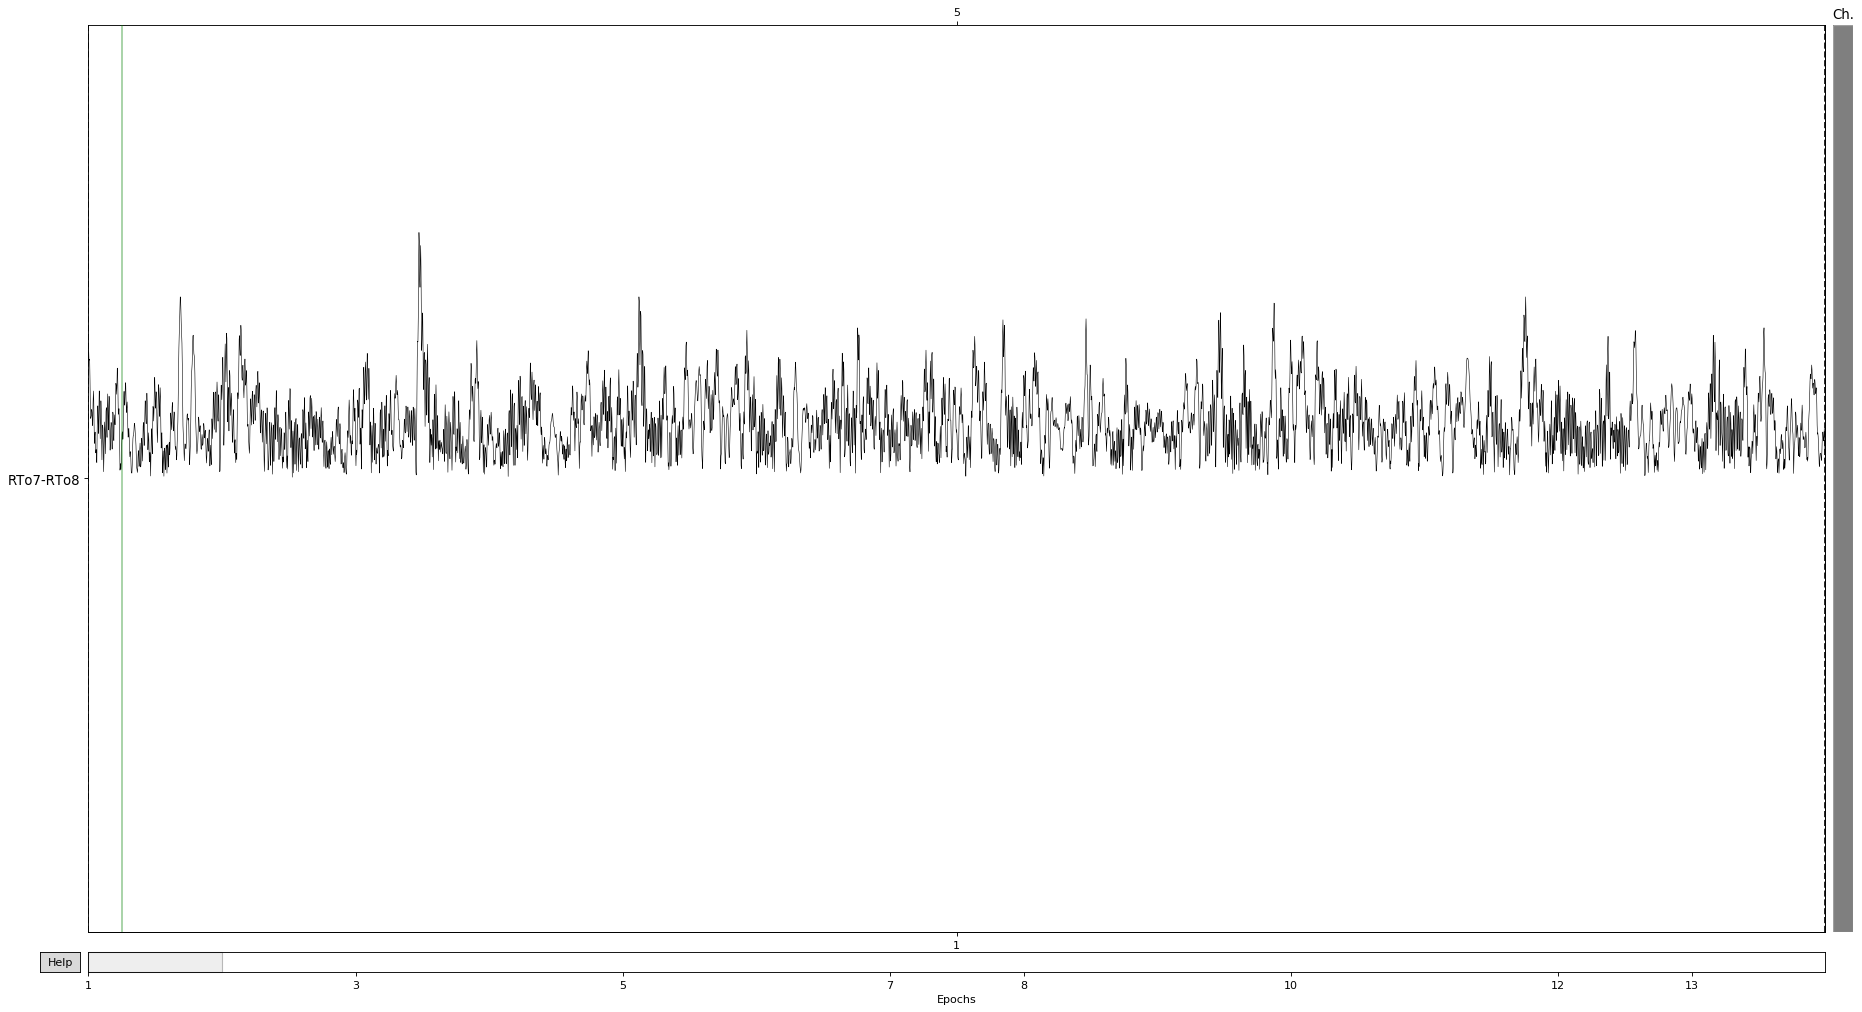

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']


In [100]:
epochs_filt = epochs['4'].load_data().copy().filter(l_freq=0.5, h_freq=30, picks='RTo7-RTo8',)
epochs_filt.plot(picks='RTo7-RTo8' , n_epochs=1, scalings=8e-5)

In [30]:
# stage 1
psds, freqs = psd_multitaper(epochs['stage 1'], low_bias=True)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0).mean(0)

# stage 2

psds2, freqs = psd_multitaper(epochs['stage 2'], low_bias=True)
psds2 = 10 * np.log10(psds2)
psds2_mean = psds2.mean(0).mean(0)

# stage 3

psds3, freqs = psd_multitaper(epochs['stage 3'], low_bias=True)
psds3 = 10 * np.log10(psds3)
psds3_mean = psds3.mean(0).mean(0)


plt.plot(freqs, psds_mean, color='b')
plt.plot(freqs, psds2_mean, color='r')
plt.plot(freqs, psds3_mean, color='g')

plt.xscale('log')
plt.xlim(xmin=1, xmax=50)

Loading data for 40 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 40 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 20 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


(1, 50)

In [16]:
# Power
freqs = np.arange(5., 30., 1.)
ncycles = 2
power =  tfr_morlet(epochs['stage 3'], freqs=freqs,
                       n_cycles=ncycles, return_itc=False)


Applying baseline correction (mode: mean)


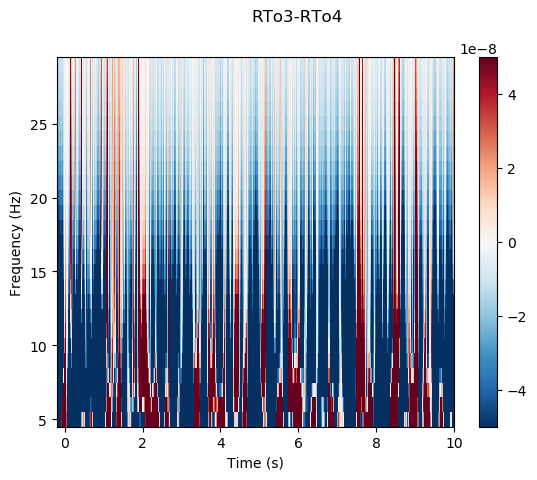

In [31]:
vmax = 5e-8
vmin = -vmax 
power.plot([37], baseline=(0., 0.1), vmin=vmin, vmax=vmax, mode='mean', show=False,
               colorbar=True)

In [33]:
epochs.load_data()

Loading data for 100 events and 5101 original time points ...
0 bad epochs dropped


<Epochs  |   100 events (all good), -0.2 - 10 sec, baseline [None, 0], ~284.3 MB, data loaded,
 'stage 1': 40
 'stage 2': 40
 'stage 3': 20>

In [36]:
csd_mt = csd_multitaper(epochs['stage 1'], fmin=5, fmax=20, adaptive=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Computing cross-spectral density from epochs...
    Computing CSD matrix for epoch 1
    Computing CSD matrix for epoch 2
    Computing CSD matrix for epoch 3
    Computing CSD matrix for epoch 4
    Computing CSD matrix for epoch 5
    Computing CSD matrix for epoch 6
    Computing CSD matrix for epoch 7
    Computing CSD matrix for epoch 8
    Computing CSD matrix for epoch 9
    Computing CSD matrix for epoch 10
    Computing CSD matrix for epoch 11
    Computing CSD matrix for epoch 12
    Computing CSD matrix for epoch 13
    Computing CSD matrix for epoch 14
    Computing CSD matrix for epoch 15
    Computing CSD matrix for epoch 16
    Computing CSD matrix for epoch 17
    Computing CSD matrix for epoch 18
    Computing CSD matrix for epoch 19
    Computing CSD matrix for epoch 20
    Computing CSD matrix for epoch 21
    Computing CSD matrix for epoch 22
    Computing CSD matrix for epoch 23
    Computing CSD matrix f

In [37]:
csd_mt.mean().plot(mode='coh')
plt.suptitle('adaptive multitapers')

Text(0.5, 0.98, 'adaptive multitapers')

<CrossSpectralDensity  |  n_channels=64, time=-0.2 to 20.0 s, frequencies=6.039006039006039 Hz.>